# Affine transforms
Here we compare performance of affine transforms implemented in [cupy](https://cupy.dev), [scipy](https://scipy.org) and clEsperanto

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [1]:
import pyclesperanto_prototype as cle
import pyclesperanto as pcle

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [11]:
device = pcle.select_device("RTX")
device

(OpenCL) NVIDIA GeForce RTX 3050 Ti Laptop GPU (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 20
	Global Memory Size: 4294 MB
	Maximum Object Size: 1073 MB

In [3]:
from skimage.io import imread, imshow
image = imread('data/Haase_MRT_tfl3d1.tif')

(120, 160, 160)

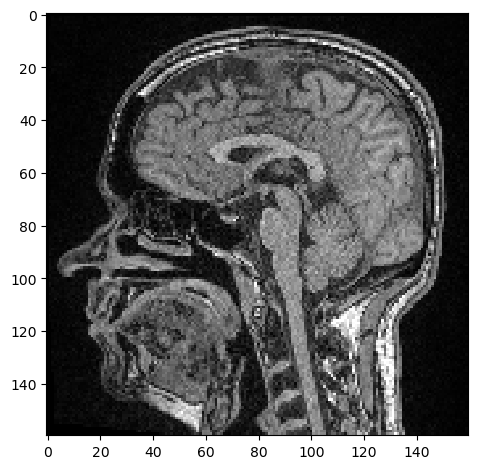

In [4]:
imshow(image[60])
image.shape

In [5]:
import numpy as np

# scaling by factor 1 / s
s = 0.5
matrix = np.asarray([
    [s, 0, 0, 0],
    [0, s, 0, 0],
    [0, 0, s, 0],
    [0, 0, 0, 1],
])
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
print(output_shape)


(240, 320, 320)


## clEsperanto prototype

clEsperanto affine transform duration: 0.7302675247192383
clEsperanto affine transform duration: 0.03125357627868652
clEsperanto affine transform duration: 0.01562643051147461
clEsperanto affine transform duration: 0.01562643051147461
clEsperanto affine transform duration: 0.03125333786010742
clEsperanto affine transform duration: 0.01562666893005371
clEsperanto affine transform duration: 0.031320810317993164
clEsperanto affine transform duration: 0.016004323959350586
clEsperanto affine transform duration: 0.015181303024291992
clEsperanto affine transform duration: 0.03125309944152832


C:\Users\haase\mambaforge\envs\tea4\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


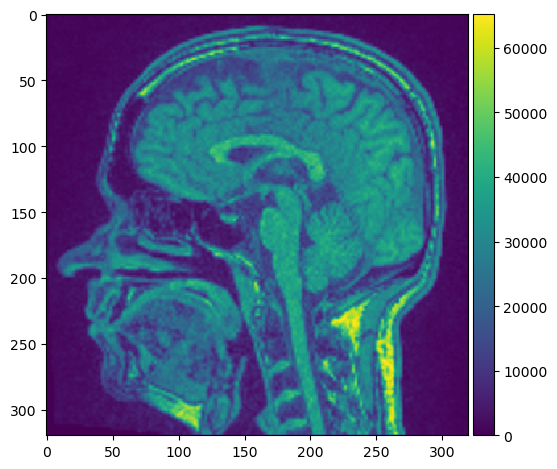

In [13]:
ocl_image = cle.push(image)

ocl_scaled = cle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix), linear_interpolation=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = cle.pull(ocl_scaled)
imshow(result[120])

In [8]:
pcle.affine_transform?

Signature:
pcle.affine_transform(
    input_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array],
    output_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array] = None,
    transform_matrix: list = None,
    interpolate: bool = False,
    resize: bool = False,
    device: pyclesperanto._pyclesperanto._Device = None,
) -> Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array]
Docstring:
Apply an affine transformation matrix to an array and return the result.  The
transformation matrix must be 3x3 or 4x4 stored as a 1D array.  The matrix
should be row-major, i.e. the first 3 elements are the first row of the matrix.
If no matrix is given, the identity matrix will be used.

Parameters
----------
input_image: Image
    Input Array to be transformed.
output_image: Image = None
    Output Array.
transform_matrix: list = None
    Affine transformation matrix (3x3 or 4x4).
interpolate: bool = False
    If true, bi/trilinear interpolation will be applied, if hardware

In [15]:
ocl_image = pcle.push(image)

ocl_scaled = pcle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    pcle.affine_transform(ocl_image, ocl_scaled, transform_matrix=np.linalg.inv(matrix), interpolate=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = pcle.pull(ocl_scaled)
imshow(result[120])

TypeError: _affine_transform(): incompatible function arguments. The following argument types are supported:
    1. (device: pyclesperanto._pyclesperanto._Device, src: pyclesperanto._pyclesperanto._Array, dst: pyclesperanto._pyclesperanto._Array, transform_matrix: list[float], interpolate: bool, resize: bool) -> pyclesperanto._pyclesperanto._Array

Invoked with: kwargs: device=(OpenCL) NVIDIA GeForce RTX 3050 Ti Laptop GPU (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 20
	Global Memory Size: 4294 MB
	Maximum Object Size: 1073 MB
, src=array([[[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,  992, ..., 1221, 1297,    0],
        [   0,    0, 1526, ..., 1144, 2213,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0, 2213, ...,  916,  610,    0],
        [   0,    0, 2365, ..., 1297, 1068,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0, 1068, ...,  153,  381,    0],
        [   0,    0, 1526, ...,  305,  458,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       ...,

       [[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,  610, ...,  763, 1068,  534],
        [   0,    0,  305, ..., 1221,  381,  610],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,  229, ...,  763,  916,    0],
        [   0,    0,  458, ...,  839,  992,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[   0,    0,    0, ...,    0,    0,    0],
        [   0,    0, 1144, ...,  687, 1450,    0],
        [   0,    0,  381, ..., 1068,  763,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]]], dtype=uint16, mtype=buffer), dst=array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32, mtype=buffer), transform_matrix=array([[2., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 1.]]), interpolate=True, resize=False

## Scipy

scipy affine transform duration: 7.142598867416382
scipy affine transform duration: 7.073591470718384
scipy affine transform duration: 6.876546859741211
scipy affine transform duration: 6.865544080734253
scipy affine transform duration: 6.875546932220459
scipy affine transform duration: 6.8615429401397705
scipy affine transform duration: 6.608499765396118
scipy affine transform duration: 6.803070545196533
scipy affine transform duration: 6.62677526473999
scipy affine transform duration: 6.507538795471191


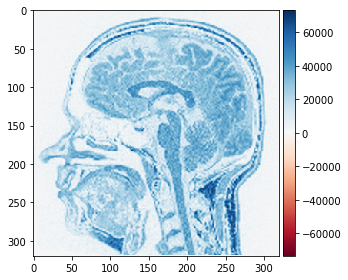

In [7]:
import time
from scipy import ndimage as sndi

scaled = np.ndarray(output_shape)
for i in range(0, 10):
    start_time = time.time()
    sndi.affine_transform(image, matrix, output=scaled, output_shape=output_shape)
    print("scipy affine transform duration: " + str(time.time() - start_time))

imshow(scaled[120])